In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import folium
plt.rc('font', family='NanumBarunGothic') 

In [22]:
# Load the dataset
customer = pd.read_csv('customer.csv')

In [23]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [24]:
# 정보 확인
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [25]:
# 중복값 확인
customer.duplicated().sum()

0

In [26]:
#결측치 확인
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [27]:
# 자료 형태 확인
print("customer_id:", customer['customer_id'].nunique())
print("first_name:", customer['first_name'].nunique())
print("last_name:", customer['last_name'].nunique())
print("username:", customer['username'].nunique())
print("email:", customer['email'].nunique())
print("gender:", customer['gender'].unique())
print("birthdate:", customer['birthdate'].nunique())
print("device_type:", customer['device_type'].unique())
print("device_id:", customer['device_id'].nunique())
print("device_version:", customer['device_version'].nunique())
print("home_location_lat:", customer['home_location_lat'].nunique())
print("home_location_long:", customer['home_location_long'].nunique())
print("home_location:", customer['home_location'].unique())
print("home_country:", customer['home_country'].unique())
print("first_join_date:", customer['first_join_date'].nunique())

customer_id: 100000
first_name: 707
last_name: 173
username: 100000
email: 100000
gender: ['F' 'M']
birthdate: 13003
device_type: ['iOS' 'Android']
device_id: 100000
device_version: 86
home_location_lat: 71427
home_location_long: 71427
home_location: ['Sumatera Barat' 'Jakarta Raya' 'Nusa Tenggara Barat' 'Kalimantan Timur'
 'Kalimantan Selatan' 'Kepulauan Riau' 'Bengkulu' 'Jawa Barat'
 'Nusa Tenggara Timur' 'Yogyakarta' 'Jawa Timur' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Lampung' 'Bangka Belitung' 'Maluku' 'Sulawesi Utara'
 'Sulawesi Barat' 'Jambi' 'Kalimantan Tengah' 'Sumatera Utara'
 'Kalimantan Barat' 'Papua Barat' 'Sulawesi Selatan' 'Maluku Utara'
 'Banten' 'Bali' 'Riau' 'Sumatera Selatan' 'Aceh' 'Papua'
 'Sulawesi Tengah' 'Gorontalo']
home_country: ['Indonesia']
first_join_date: 2223


In [28]:
# 년도 datetime으로 타입 변경
customer['birthdate'] = pd.to_datetime(customer['birthdate'])
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])


In [29]:
# 현재 시점 년도 추가 
date_to_insert = pd.to_datetime('2022-07-31')
customer['new_date_column'] = date_to_insert

In [30]:
# 가입일 당시의 나이 계산
customer['age'] = (customer['new_date_column'] - customer['birthdate']).dt.days // 365

In [31]:
# 새로 생성한 현재시점 데이터 삭제
customer.drop(columns=['new_date_column'], inplace=True)

In [32]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,28
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22


In [33]:
#브랜드와 제품사양 분리
customer['device'] = customer['device_version'].str.split().str[0]
customer['version'] = customer['device_version'].str.split().str[1:].apply(' '.join)
customer['device'] = customer['device'].str.replace(';', '')

In [34]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,device,version
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,iPhone,CPU iPhone OS 14_2_1 like Mac OS X
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,28,Android,2.2.1
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,iPad,CPU iPad OS 4_2_1 like Mac OS X
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,iPad,CPU iPad OS 14_2 like Mac OS X
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,iPhone,CPU iPhone OS 10_3_3 like Mac OS X


In [35]:
customer.loc[customer['age'] <= 19, 'age_group'] = '10대'
customer.loc[(customer['age'] > 19)&(customer['age'] <= 29), 'age_group'] = '20대'
customer.loc[(customer['age'] > 29)&(customer['age'] <= 39), 'age_group'] = '30대'
customer.loc[(customer['age'] > 39)&(customer['age'] <= 49), 'age_group'] = '40대'
customer.loc[(customer['age'] > 49)&(customer['age'] <= 59), 'age_group'] = '50대'


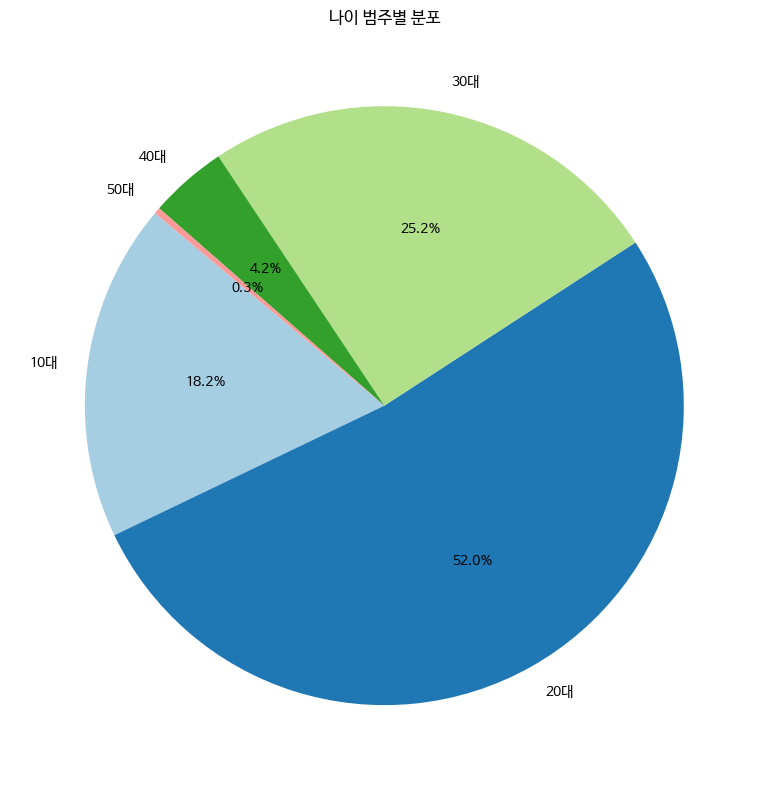

In [40]:
# 범주별로 그룹화하여 카운트 계산
age_group_counts = customer['age_group'].value_counts().sort_index()

# pie 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('나이 범주별 분포')
plt.tight_layout()
plt.show()

In [37]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,device,version,age_group
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26,iPhone,CPU iPhone OS 14_2_1 like Mac OS X,20대
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,28,Android,2.2.1,20대
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,33,iPad,CPU iPad OS 4_2_1 like Mac OS X,30대
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,31,iPad,CPU iPad OS 14_2 like Mac OS X,30대
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22,iPhone,CPU iPhone OS 10_3_3 like Mac OS X,20대


In [38]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  datetime64[ns]
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  home_country        100000 non

In [39]:
#타입변경
customer['gender'] = customer['gender'].astype('category')
customer['device_type'] = customer['device_type'].astype('category')
customer['device'] = customer['device'].astype('category')
customer['age_group'] = customer['age_group'].astype('category')

In [41]:
customer.to_csv("customer_n.csv", index=False)